In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [2]:
data_train_path = r"D:\Introduction to Programming with Python\PythonProjects\image_classification\train"
data_test_path = r"D:\Introduction to Programming with Python\PythonProjects\image_classification\test"
data_val_path = r"D:\Introduction to Programming with Python\PythonProjects\image_classification\validation"

In [17]:
img_width = 180
img_height = 180

In [18]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle= True ,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False
)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [46]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
data_val =tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle= False ,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False
)

Found 351 files belonging to 36 classes.


In [ ]:
data_test =tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle= False ,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False
)

Found 359 files belonging to 36 classes.


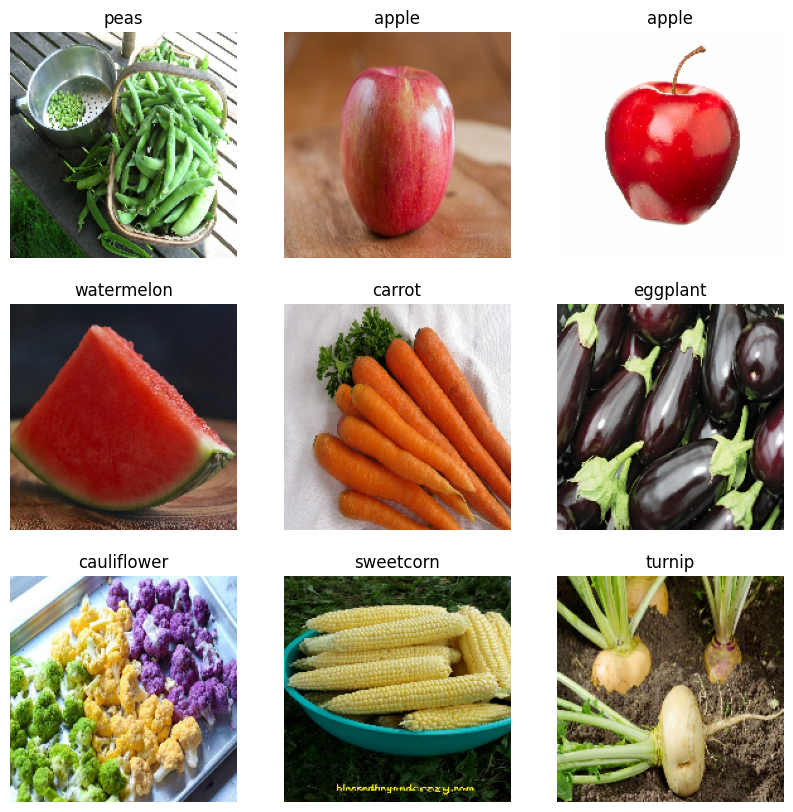

In [8]:
plt.figure(figsize=(10,10))
for image , labels in data_train.take(1):
    for i in range (9):
        plt.subplot( 3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
model = keras.Sequential([
    # Conv2D layer with 32 filters and a 3x3 kernel
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3 , padding='same' , activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3 , padding='same' , activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
    
])

In [10]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [11]:
epochs_size = 25
history = model.fit(data_train, validation_data= data_val, epochs= epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.0631 - loss: 3.9104 - val_accuracy: 0.2821 - val_loss: 2.4831
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.2448 - loss: 2.6319 - val_accuracy: 0.5043 - val_loss: 1.7976
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.4038 - loss: 2.0909 - val_accuracy: 0.7037 - val_loss: 1.0653
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.5482 - loss: 1.5582 - val_accuracy: 0.8462 - val_loss: 0.6679
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.6940 - loss: 1.0811 - val_accuracy: 0.8974 - val_loss: 0.4288
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.8265 - loss: 0.5953 - val_accuracy: 0.9145 - val_loss: 0.4013
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8833 - loss: 0.4040 - val_accuracy: 0.9231 - val_loss: 0.3616
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9287 - loss: 0.2838 - val_accuracy: 0.9601 - v

Text(0.5, 1.0, 'loss')

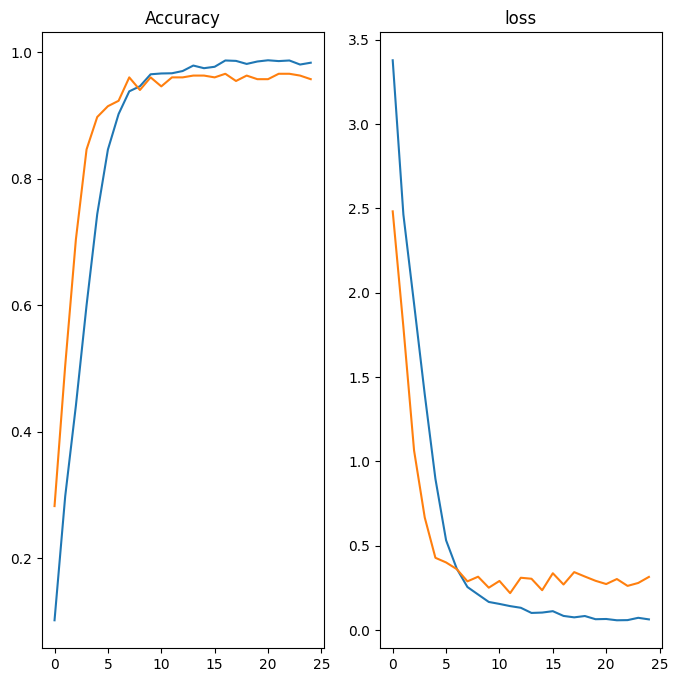

In [12]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'],label ='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label= 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'],label ='Training loss')
plt.plot(epochs_range, history.history['val_loss'], label= 'Validation loss')
plt.title('loss')

In [41]:
image = 'D:\Introduction to Programming with Python\PythonProjects\image_classification\pear.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_width, img_height))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [42]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [43]:
score = tf.nn.softmax(predict)


In [44]:
print('Veg/Fruit in image is {} with accuracy of {:.2f}%'.format(data_cat[np.argmax(score)], np.max(score) * 100))


Veg/Fruit in image is pear with accuracy of 100.00%


In [45]:
model.save('image_classifier.keras')